In [8]:
import lammps_logfile 
import matplotlib.pyplot as plt


def anisotropic_swelling(lx0, ly0, lz0, avol0, pka, path):
    """
    Plots the size deformation before and after NPT annealing.

    Parameters:
    lx0, ly0, lz0 : float
        Original simulation box size in x, y, z directions respectively.
    avol0 : float
        Original atomic volume.
    pka : list
        List of PKA numbers.
    path : str
        File path to the directory containing the LAMMPS log files.

    Returns:
    None
    """

    # Set up the plot parameters
    plt.rcParams['axes.linewidth'] = 1
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams["font.family"] = "arial"
    fig, axs = plt.subplots(1, figsize=(6/2.54, 4.6/2.54), sharey=True)
    plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99, wspace=0.05, hspace=0.1)

    # Initialize lists to hold deformation data
    avol, lx, ly, lz = [], [], [], []
    lx1, ly1, lz1 = [], [], []

    # Read data from LAMMPS log files
    for i in pka:
        fn = f'{path}lammps.anneal1_{i}'
        log = lammps_logfile.File(fn)
        avol.append(log.get("v_avol")[-1] / avol0)
        lx.append((log.get("Lx")[-1] / lx0)-1)
        ly.append((log.get("Ly")[-1] / ly0)-1)
        lz.append((log.get("Lz")[-1] / lz0)-1)
        lx1.append((log.get("Lx")[0] / lx0)-1)
        ly1.append((log.get("Ly")[0] / ly0)-1)
        lz1.append((log.get("Lz")[0] / lz0)-1)
    #print(log.get("Lx")[0],log.get("Ly")[0],log.get("Lz")[0])
    # Plot the data
    axs.plot(pka, lx, marker="o", color='royalblue', linestyle='--', markersize=5, label='x')
    axs.plot(pka, ly, marker="o", color='green', linestyle='--', markersize=5, label='y')
    axs.plot(pka, lz, marker="o", color='orangered', linestyle='--', markersize=5, label='z')
    axs.plot(pka, lx1, color='royalblue', marker="o", markerfacecolor='white', linestyle='', markersize=5)
    axs.plot(pka, ly1, color='green', marker="o", markerfacecolor='white', linestyle='', markersize=5)
    axs.plot(pka, lz1, color='orangered', marker="o", markerfacecolor='white', linestyle='', markersize=5)

    # Add arrows to indicate deformation direction
    #for i in range(len(pka)):
        #axs.annotate('', xy=(pka[i], lz[i]), xytext=(pka[i], lz1[i]), arrowprops=dict(color='red', arrowstyle='->', lw=1, ls='-'))

    # Set labels and legend
    axs.set_ylabel(r'Strain, $\epsilon$',fontsize=10)
    axs.set_xlabel('PKA numbers', fontsize=10)
    axs.tick_params(width=1, length=3, labelsize=10)
    axs.legend(fontsize=10, frameon=False)
    # Set y-axis limits
    #axs.set_ylim([-0.04, 0.4])  # Assuming deformation fraction ranges from -0.2% to 0.2%
    # Display the plot
    #plt.grid()
    plt.show()
    #plt.plot(pka,avol)
    return lx,ly,lz,avol
# Example usage:
#anisotropic_swelling(lx0, ly0, lz0, avol0, pka, path)


In [24]:

def anisotropic_swelling2(lx0, ly0, lz0, avol0, pka, path):
    """
    Plots the size deformation before and after NPT annealing.

    Parameters:
    lx0, ly0, lz0 : float
        Original simulation box size in x, y, z directions respectively.
    avol0 : float
        Original atomic volume.
    pka : list
        List of PKA numbers.
    path : str
        File path to the directory containing the LAMMPS log files.

    Returns:
    None
    """

    # Set up the plot parameters
    plt.rcParams['axes.linewidth'] = 1
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams["font.family"] = "arial"
    fig, axs = plt.subplots(1, figsize=(6/2.54, 4.6/2.54), sharey=True)
    plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99, wspace=0.05, hspace=0.1)

    # Initialize lists to hold deformation data
    avol, lx, ly, lz = [], [], [], []
    lx1, ly1, lz1 = [], [], []


    # Read data from LAMMPS log files
    for i in pka:
        fn = f'{path}lammps-npt_2ps{i}.log'
        log = lammps_logfile.File(fn)
        avol.append(log.get("v_avol")[-1] / avol0)
        lx.append((log.get("Lx")[-1] / lx0)-1)
        ly.append((log.get("Ly")[-1] / ly0)-1)
        lz.append((log.get("Lz")[-1] / lz0)-1)
        lx1.append((log.get("Lx")[0] / lx0)-1)
        ly1.append((log.get("Ly")[0] / ly0)-1)
        lz1.append((log.get("Lz")[0] / lz0)-1)
    #print(log.get("Lx")[0],log.get("Ly")[0],log.get("Lz")[0])
    # Plot the data
    axs.plot(pka, lx, marker="o", color='royalblue', linestyle='--', markersize=5, label='x')
    axs.plot(pka, ly, marker="o", color='green', linestyle='--', markersize=5, label='y')
    axs.plot(pka, lz, marker="o", color='orangered', linestyle='--', markersize=5, label='z')
    axs.plot(pka, lx1, color='royalblue', marker="o", markerfacecolor='white', linestyle='', markersize=5)
    axs.plot(pka, ly1, color='green', marker="o", markerfacecolor='white', linestyle='', markersize=5)
    axs.plot(pka, lz1, color='orangered', marker="o", markerfacecolor='white', linestyle='', markersize=5)
    # Add arrows to indicate deformation direction
    for i in range(len(pka)):
        axs.annotate('', xy=(pka[i], lx[i]), xytext=(pka[i], lx1[i]),arrowprops=dict(color='royalblue', arrowstyle='->',lw=1,ls='-'))
        axs.annotate('', xy=(pka[i], ly[i]), xytext=(pka[i], ly1[i]),arrowprops=dict(color='green', arrowstyle='->',lw=1,ls='-'))

    #for i in range(len(pka)):
        #axs.annotate('', xy=(pka[i], lz[i]), xytext=(pka[i], lz1[i]), arrowprops=dict(color='red', arrowstyle='->', lw=1, ls='-'))

    # Set labels and legend
    axs.set_ylabel(r'Strain, $\epsilon$',fontsize=10)
    axs.set_xlabel('PKA numbers', fontsize=10)
    axs.tick_params(width=1, length=3, labelsize=10)
    axs.legend(fontsize=10, frameon=False)
    # Set y-axis limits
    axs.set_ylim([-0.06, 0.06])  # Assuming deformation fraction ranges from -0.2% to 0.2%
    # Display the plot
    #plt.grid()
    plt.show()
    #plt.plot(pka,avol)
    return lx,ly,lz,avol
# Example usage:
#anisotropic_swelling(lx0, ly0, lz0, avol0, pka, path)


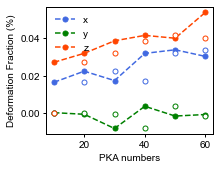

In [4]:
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/cascade_anneal/anisotropic/anneal_log/010/anneal_log/'
avol0=11.0838
lx0=145.8696738    
ly0=296.9767609   
lz0=141.4800266
pka=[i+10 for i in range(0,60,10)]
lx,ly,lz,avol=anisotropic_swelling(lx0, ly0, lz0, avol0, pka, path)
#plt.plot(pka,avol)

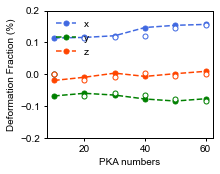

In [3]:
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/cascade_anneal/anisotropic/anneal_log/100/anneal_log/'
avol0=11.0838
lx0=291.4543455    
ly0=148.5655268     
lz0=141.5348142 
pka=[i+10 for i in range(0,60,10)]
lx,ly,lz,avol=anisotropic_swelling(lx0, ly0, lz0, avol0, pka, path)

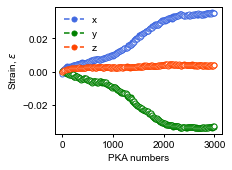

In [9]:
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/cascade_anneal/out/'
avol0=11.08054726
lx0=97.2529    
ly0=98.9999    
lz0=94.3839 
pka=[i for i in range(10, 3000,20)]
lx,ly,lz,avol=anisotropic_swelling(lx0, ly0, lz0, avol0, pka, path)


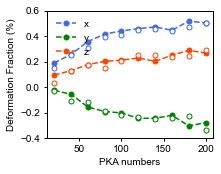

In [54]:
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/cascade_anneal/anisotropic/anneal_log/small_box/100/anneal_log/'
avol0=11.08054726
lx0=97.14422072   
ly0=99.03631599   
lz0=94.34952293
pka=[i+10 for i in range(10,200,20)]
lx,ly,lz,avol=anisotropic_swelling(lx0, ly0, lz0, avol0, pka, path)
#plt.plot(pka,avol)

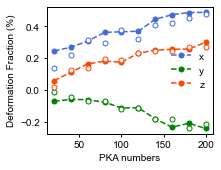

In [6]:
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/cascade_anneal/anisotropic/anneal_log/small_box/010/anneal_log/'
avol0=11.08054726
lx0=97.14422072   
ly0=99.03631599   
lz0=94.34952293
pka=[i+10 for i in range(10,200,20)]
lx,ly,lz,avol=anisotropic_swelling(lx0, ly0, lz0, avol0, pka, path)
#plt.plot(pka,avol)

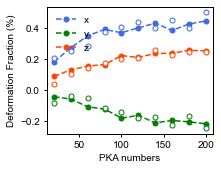

In [52]:
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/cascade_anneal/anisotropic/anneal_log/small_box/00z/anneal_log/'
avol0=11.08054726
lx0=97.14422072   
ly0=99.03631599   
lz0=94.34952293
pka=[i+10 for i in range(10,200,20)]
lx,ly,lz,avol=anisotropic_swelling(lx0, ly0, lz0, avol0, pka, path)
#plt.plot(pka,avol)

In [62]:
import ase.io
from ase.data import atomic_numbers
import random
from ase import Atoms

datafile = '/home/heruhe/Desktop/Ga2o3/relaxed_dataframes/1280atom.relaxed'
elements = ['B','Be','H','He','Li']  # to keep atom type number,assign type 1 to B,2 to Be, 3 to H, 4 to He, 5 to Li
elements_real = ['O1','O2','O3','Ga2','Ga1'] # to show atom's right symbol, type 1 is assigned to B
 
Zs = [atomic_numbers[s] for s in elements]
Zs.insert(0, 0)  # 1st lammps type = 1
atoms = ase.io.read(datafile, format='lammps-data', style='atomic', Z_of_type=Zs, sort_by_id=True)


Ga_atoms=[atom for atom in atoms if atom.mass > 40 and atom.position[0] <6]
Ga=random.choice(Ga_atoms)

print(Ga.number,Ga)
elements_real[Ga.number-1]

4 Atom('Be', [4.298118470563247, -0.013125211821864859, 14.806083997169956], momentum=[-0.5268172975653349, -0.9005986434345665, 0.19346031889497825], mass=69.72300001793583, index=641)


'Ga2'

[100, 200, 300, 400, 501, 600, 601, 701, 800, 801, 901, 1000, 1001, 1101, 1111, 1200, 1201, 1304, 1400, 1404, 1504, 1600, 1604, 1704, 1800, 1804, 1904, 2000, 2004, 2160, 2200, 2400]


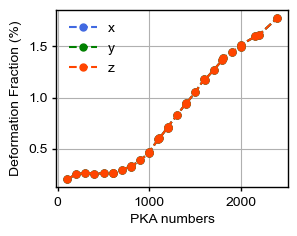

In [35]:
import os
import re
    # Set up the plot parameters
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams["font.family"] = "arial"
fig, axs = plt.subplots(1, figsize=(6/2.54, 4.6/2.54), sharey=True)
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99, wspace=0.05, hspace=0.1)

avol0=11.08054726
lx0=121.441   
ly0=123.806 
lz0=117.947


# List all files in the current directory
files = os.listdir('/Users/ruhe/Desktop/ga2o3/overlapping/bigbox_without_npt/nvt_log/log')  # Replace with your actual folder path

# Extract numbers from filenames
numbers = []
for file in files:
    match = re.search(r"lammps-anneal(\d+)\.log", file)
    if match:
        numbers.append(int(match.group(1)))

# Sort and print the extracted numbers
numbers.sort()
print(numbers)
dx=[]
dy=[]
dz=[]
for i in numbers:
# Open and read the file
    with open("/Users/ruhe/Desktop/ga2o3/overlapping/bigbox_without_npt/nvt_log/log/lammps-anneal{}.log".format(i), "r") as file:
        lines = file.readlines()

    # Loop through lines to find the box size
    for line in lines:
        match = re.search(r"orthogonal box = \((.*?)\) to \((.*?)\)", line)
        if match:
            lx,ly,lz = list(map(float, match.group(2).split()))
            break
    dx.append((lx-lx0)*100/lx0)
    dy.append((ly-ly0)*100/ly0)
    dz.append((lz-lz0)*100/lz0)
#print(dx,dy,dz)       
axs.plot(numbers, dx,  marker="o",color='royalblue', linestyle='--',markersize=5,label='x')
axs.plot(numbers, dy, marker="o", color='green', linestyle='--', markersize=5, label='y')
axs.plot(numbers, dz, marker="o", color='orangered', linestyle='--', markersize=5, label='z')
# Set labels and legend
axs.set_ylabel('Deformation Fraction (%)', fontsize=10)
axs.set_xlabel('PKA numbers', fontsize=10)
axs.tick_params(width=1, length=3, labelsize=10)
axs.legend(fontsize=10, frameon=False)
    # Set y-axis limits
#axs.set_ylim([-0.1, 0.1])  # Assuming deformation fraction ranges from -0.2% to 0.2%
    # Display the plot
plt.grid()
plt.show()           

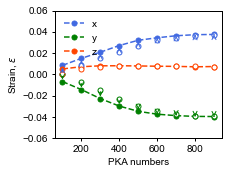

0.03440214135275199 -0.03735339705139851 0.007675927036852492


In [26]:

avol0=11.0838
lx0=97.1442   
ly0=99.03  
lz0=94.349

pka=[i for i in range(100,1000,100)]
path2='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/cascade_npt/small1500ev_npt_100/npt_log/'
lx,ly,lz,avol=anisotropic_swelling2(lx0, ly0, lz0, avol0, pka, path2)
print(lx[5],ly[5],lz[5])



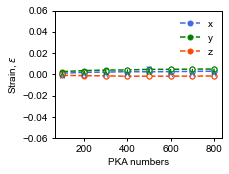

In [25]:
avol0=11.03859705
lx0=142.1211565 
ly0=122.808571
lz0=131.1449144
pka=[i for i in range(100,801,100)]
path2='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/cascade_npt/gamma2000ev_npt_100/npt_log/'
lx,ly,lz,avol=anisotropic_swelling2(lx0, ly0, lz0, avol0, pka, path2)